Euler Method
=======

# Theory

## Definition


### Algorithm


## Examples


# Implementation


## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [15]:
N = 30
domain = [1,5]

# f = lambda t,x: -2*t*x

f = lambda t,x: np.sin(t)
analytic = lambda t: -np.cos(t) + 2 + np.cos(1)

## Algorithm


In [16]:
def euler_stepping(t: np.array, f: callable, x_0: float) -> np.array:
    '''
    _summary_

    Args:
        t: _description_
        f: _description_
        x_0: _description_

    Returns:
        _description_
    '''
    
    # stepping pap
    dt = t[1] - t[0]
    x = np.zeros_like(t)

    # initial condition
    x[0] = x_0

    for n in range(0, len(t)-1):

        # single euler step
        x[n+1] = x[n] + dt*f(t[n], x[n])

    return x

In [17]:
t = np.linspace(*domain, num=N)
x_sol = euler_stepping(t, f=f, x_0=2)

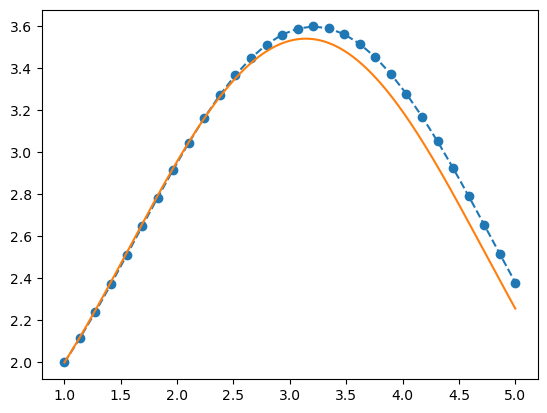

In [18]:
plt.plot(t, x_sol, "o--")
plt.plot(np.linspace(1,5, num=500), analytic(np.linspace(1,5, num=500)))

plt.show()